In [2]:

pip install spacy

Note: you may need to restart the kernel to use updated packages.


# libraries 

In [3]:
import pandas as pd #for data processing 
import numpy as np #for linear algebra
import string #for special operations 
import matplotlib.pyplot as plt #for visualization
from matplotlib.pyplot import imread #used to read images from the file
import spacy #used for advanced natural language processing 
import wordcloud #used for graphical representation of word frequency 

# Data 

In [4]:
review = pd.read_csv('finaldata.csv')

In [5]:
review

,Reviews,Ratings
0,Attended a conference here. The location is go...,4.0
1,"Above all else, every dealing I had was with f...",4.0
2,We where here for Oakton. I had a great time w...,5.0
3,"I will be back, all staff are friendly and pro...",5.0
4,I have stayed here several time before attendi...,3.0
...,...,...
5795,I thought this Hyatt was quite luxurious and h...,3.0
5796,My sister and I drove into DC for an over-nigh...,5.0
5797,I stayed 3 nights at the Hyatt for a conferenc...,4.0
5798,I went to this hotel with my wife for the week...,1.0


# Data Preprocessing

In [6]:
review.shape

(5800, 2)

In [7]:
review.dtypes

Reviews     object
Ratings    float64
dtype: object

In [8]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  5800 non-null   object 
 1   Ratings  5799 non-null   float64
dtypes: float64(1), object(1)
memory usage: 90.8+ KB


In [9]:
review.isnull().sum()

Reviews    0
Ratings    1
dtype: int64

In [10]:
# removing null values
df_review = review.dropna(axis=0, how = 'any')
df_review

,Reviews,Ratings
0,Attended a conference here. The location is go...,4.0
1,"Above all else, every dealing I had was with f...",4.0
2,We where here for Oakton. I had a great time w...,5.0
3,"I will be back, all staff are friendly and pro...",5.0
4,I have stayed here several time before attendi...,3.0
...,...,...
5795,I thought this Hyatt was quite luxurious and h...,3.0
5796,My sister and I drove into DC for an over-nigh...,5.0
5797,I stayed 3 nights at the Hyatt for a conferenc...,4.0
5798,I went to this hotel with my wife for the week...,1.0


In [11]:
df_review.isnull().sum()

Reviews    0
Ratings    0
dtype: int64

In [12]:
#removing special Character
import re #regular expression
import string

def clean_text(text):
    text = re.sub('(<a).*(>).*()', '',text)
    text = re.sub('(&amp)', '',text)
    text = re.sub('(&gt)', '',text)
    text = re.sub('(&lt)', '',text)
    text = re.sub('(\xa0)', ' ',text)
    text = re.sub('(^\w\s)','',text)
    text = re.sub('(0-9)','',text)
    text = re.sub('\[.*?\@!]', '', text)
    text = re.sub('(,)','',text)
    

    return(text)
clean = lambda x: clean_text(x)

In [13]:
df_review["Reviews"] = df_review["Reviews"].apply(clean)

<ipython-input-13-c84bda990855>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["Reviews"] = df_review["Reviews"].apply(clean)


In [14]:
df_review.Reviews

0       Attended a conference here. The location is go...
1       Above all else every dealing I had was with fr...
2       We where here for Oakton. I had a great time w...
3       will be back all staff are friendly and profes...
4       have stayed here several time before attending...
                              ...                        
5795    thought this Hyatt was quite luxurious and had...
5796    My sister and I drove into DC for an over-nigh...
5797    stayed 3 nights at the Hyatt for a conference ...
5798    went to this hotel with my wife for the weeken...
5799    We had two adjoining rooms a 2BR Suite I think...
Name: Reviews, Length: 5799, dtype: object

In [15]:
#converting uppercase into lowercase
df_review["Reviews"]= df_review["Reviews"].str.lower()
df_review.Reviews

<ipython-input-15-4dd08991552f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["Reviews"]= df_review["Reviews"].str.lower()


0       attended a conference here. the location is go...
1       above all else every dealing i had was with fr...
2       we where here for oakton. i had a great time w...
3       will be back all staff are friendly and profes...
4       have stayed here several time before attending...
                              ...                        
5795    thought this hyatt was quite luxurious and had...
5796    my sister and i drove into dc for an over-nigh...
5797    stayed 3 nights at the hyatt for a conference ...
5798    went to this hotel with my wife for the weeken...
5799    we had two adjoining rooms a 2br suite i think...
Name: Reviews, Length: 5799, dtype: object

In [16]:
#removing stop words 
from nltk.corpus import stopwords
stop = stopwords.words('english')
df_review["Reviews"]= df_review["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_review.Reviews

<ipython-input-16-6e717cbc63a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["Reviews"]= df_review["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0       attended conference here. location good room n...
1       else every dealing friendly helpful happy empl...
2       oakton. great time niece. first time visiting ...
3       back staff friendly professional valet parking...
4       stayed several time attending hud conferences ...
                              ...                        
5795    thought hyatt quite luxurious complaints servi...
5796    sister drove dc over-night girls night stayed ...
5797    stayed 3 nights hyatt conference washington co...
5798    went hotel wife weekend thinking grand hyatt w...
5799    two adjoining rooms 2br suite think called it....
Name: Reviews, Length: 5799, dtype: object

In [17]:
#Removing less frequency words
frequency = pd.Series(' '.join(df_review["Reviews"]).split()).value_counts()
less_frequency = list(frequency[frequency ==1].index)
less_frequency

['(299',
 'planet',
 'branch.',
 'sometime',
 'footstool',
 'position)',
 'minded',
 '"helpful".',
 'breezy',
 'promtly',
 'engage',
 'halls.',
 'id.',
 'atrium-view',
 'personified.',
 'same.stay',
 'trapezoid',
 'tuberculin',
 'alvarez)',
 'atractions',
 'pyramid',
 'jima',
 'montreal',
 '(go',
 'refreshing!',
 'tactics',
 'friends/family/colleagues.',
 'poach',
 '4star',
 'vegas',
 'elevator...it',
 'restaurant...on',
 'taps',
 'organized.',
 'putrid',
 'par!',
 'aircondition',
 'upgrade�..plus',
 'reduced!',
 'breakfast....which',
 'generous.)',
 'pauls',
 'false).',
 'surreal',
 '(transit)',
 'conversation!',
 'gained',
 '(fairfield',
 'convenient)!',
 'refreshments/snacks',
 'tinyest',
 '11-year-old.',
 'projector',
 'panes',
 'service-oriented',
 'sighted',
 '(cheese',
 'advantages',
 'dusk',
 'abuse.',
 '�3+.',
 'dragged',
 'bon',
 'old�s',
 'gand',
 'goo',
 'dumps',
 'deterred',
 'painted',
 'convenience�',
 'guys!',
 'uninviting-not',
 'stay!!',
 'steam.',
 'minor)',
 'eyelas

In [18]:
df_review["Reviews"] = df_review["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in less_frequency))
df_review.Reviews

<ipython-input-18-14f450f5cf3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["Reviews"] = df_review["Reviews"].apply(lambda x: " ".join(x for x in x.split() if x not in less_frequency))


0       attended conference here. location good room n...
1       else every dealing friendly helpful happy empl...
2       great time first time visiting washington dc. ...
3       back staff friendly professional valet parking...
4       stayed several time attending conferences may ...
                              ...                        
5795    thought hyatt quite luxurious complaints servi...
5796    sister drove dc girls night stayed grand hyatt...
5797    stayed 3 nights hyatt conference washington co...
5798    went hotel wife weekend thinking grand hyatt w...
5799    two adjoining rooms suite think called it. fri...
Name: Reviews, Length: 5799, dtype: object

In [19]:
word_frequency = pd.Series(' '.join(df_review["Reviews"]).split()).value_counts()
word_frequency

hotel          6396
room           4694
staff          2730
great          2695
location       2116
               ... 
cigarettes.       2
#1                2
glassware         2
settings          2
orbitz            2
Length: 9787, dtype: int64

# EDA

In [20]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df_review["Reviews"])
word_freq = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq['frequency'] = word_freq['occurrences']/np.sum(word_freq['occurrences'])
word_freq

,term,occurrences,frequency
0,11,61,0.000233
1,119,2,0.000008
2,11am,5,0.000019
3,11pm,9,0.000034
4,11th,89,0.000340
...,...,...,...
6396,zephyr,12,0.000046
6397,zero,8,0.000031
6398,zip,2,0.000008
6399,zone,20,0.000076


# N gram

In [21]:
def get_top_n2_words(corpus, n = None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [22]:
top2_words = get_top_n2_words(df_review["Reviews"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,grand hyatt,1518
1,walking distance,787
2,front desk,589
3,great location,547
4,white house,479


[Text(0, 0, 'grand hyatt'),
 Text(1, 0, 'walking distance'),
 Text(2, 0, 'front desk'),
 Text(3, 0, 'great location'),
 Text(4, 0, 'white house'),
 Text(5, 0, 'staff friendly'),
 Text(6, 0, 'within walking'),
 Text(7, 0, 'check in'),
 Text(8, 0, 'washington dc'),
 Text(9, 0, 'room service'),
 Text(10, 0, 'metro center'),
 Text(11, 0, 'hotel great'),
 Text(12, 0, 'metro station'),
 Text(13, 0, 'room clean'),
 Text(14, 0, 'hyatt washington'),
 Text(15, 0, 'stay again'),
 Text(16, 0, 'breakfast buffet'),
 Text(17, 0, 'friendly helpful'),
 Text(18, 0, 'stayed grand'),
 Text(19, 0, 'hotel staff')]

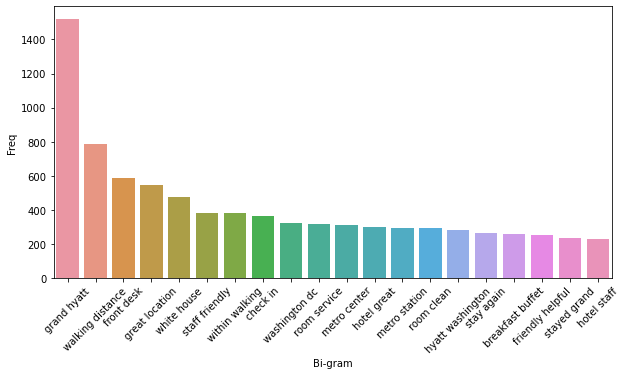

In [23]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])

In [24]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [25]:
top3_words = get_top_n3_words(df_review["Reviews"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [26]:
top3_df

,Tri-gram,Freq
0,within walking distance,370
1,grand hyatt washington,272
2,stayed grand hyatt,226
3,stay grand hyatt,166
4,hotel great location,126
...,...,...
195,washington grand hyatt,15
196,would definitely return,15
197,many good restaurants,15
198,location great walking,14


[Text(0, 0, 'within walking distance'),
 Text(1, 0, 'grand hyatt washington'),
 Text(2, 0, 'stayed grand hyatt'),
 Text(3, 0, 'stay grand hyatt'),
 Text(4, 0, 'hotel great location'),
 Text(5, 0, 'would definitely stay'),
 Text(6, 0, 'staff friendly helpful'),
 Text(7, 0, 'definitely stay again'),
 Text(8, 0, 'front desk staff'),
 Text(9, 0, 'would stay again'),
 Text(10, 0, 'walking distance many'),
 Text(11, 0, 'hyatt washington dc'),
 Text(12, 0, 'walk white house'),
 Text(13, 0, 'metro center station'),
 Text(14, 0, 'highly recommend hotel'),
 Text(15, 0, 'grand hyatt dc'),
 Text(16, 0, 'room clean comfortable'),
 Text(17, 0, 'hotel centrally located'),
 Text(18, 0, 'easy walking distance'),
 Text(19, 0, 'would recommend hotel')]

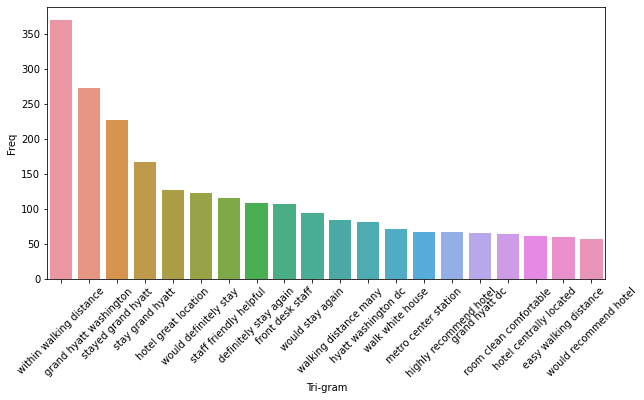

In [27]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

# wordcloud

In [28]:
string = " ".join(df_review["Reviews"])

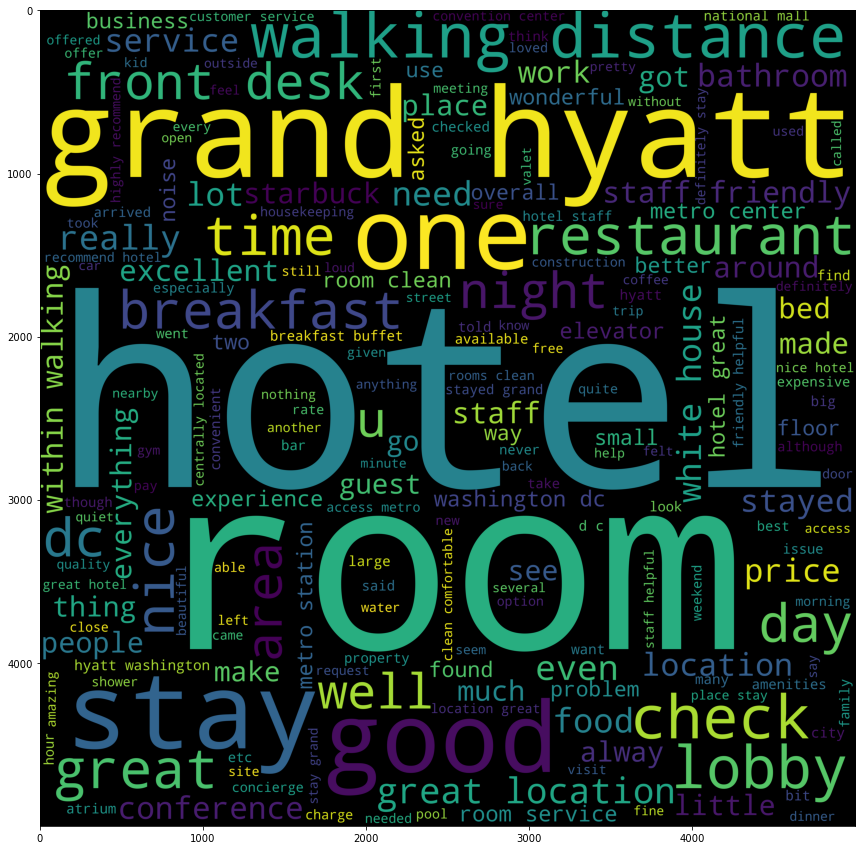

In [29]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black',width = 5000,height = 5000,).generate(string)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_stw)

# Polarity

In [30]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(df_review):
    sentiment = TextBlob(df_review["Reviews"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df_review[["subjectivity", "polarity"]] = df_review.apply(sentiment_analysis, axis=1)

df_review

C:\Users\DELL\Downloads\Anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Reviews,Ratings,subjectivity,polarity
0,attended conference here. location good room n...,4.0,0.641017,0.094264
1,else every dealing friendly helpful happy empl...,4.0,0.650000,0.593750
2,great time first time visiting washington dc. ...,5.0,0.516667,0.485000
3,back staff friendly professional valet parking...,5.0,0.364286,0.212500
4,stayed several time attending conferences may ...,3.0,0.415269,0.100323
...,...,...,...,...
5795,thought hyatt quite luxurious complaints servi...,3.0,0.530035,0.086979
5796,sister drove dc girls night stayed grand hyatt...,5.0,0.750000,0.362963
5797,stayed 3 nights hyatt conference washington co...,4.0,0.572454,0.086111
5798,went hotel wife weekend thinking grand hyatt w...,1.0,0.553333,0.380000


In [31]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [32]:
polarity = []
df_review["analysis"] = df_review["polarity"].apply(analysis)

<ipython-input-32-14546d3ed956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["analysis"] = df_review["polarity"].apply(analysis)


In [33]:
df_review

,Reviews,Ratings,subjectivity,polarity,analysis
0,attended conference here. location good room n...,4.0,0.641017,0.094264,Positive
1,else every dealing friendly helpful happy empl...,4.0,0.650000,0.593750,Positive
2,great time first time visiting washington dc. ...,5.0,0.516667,0.485000,Positive
3,back staff friendly professional valet parking...,5.0,0.364286,0.212500,Positive
4,stayed several time attending conferences may ...,3.0,0.415269,0.100323,Positive
...,...,...,...,...,...
5795,thought hyatt quite luxurious complaints servi...,3.0,0.530035,0.086979,Positive
5796,sister drove dc girls night stayed grand hyatt...,5.0,0.750000,0.362963,Positive
5797,stayed 3 nights hyatt conference washington co...,4.0,0.572454,0.086111,Positive
5798,went hotel wife weekend thinking grand hyatt w...,1.0,0.553333,0.380000,Positive


# Positive Reviews 

In [32]:
df_positive = df_review[df_review['analysis']== 'Positive']

In [33]:
df_positive.Reviews

0       attended conference here. location good room n...
1       else every dealing friendly helpful happy empl...
2       oakton. great time niece. first time visiting ...
3       back staff friendly professional valet parking...
4       stayed several time attending hud conferences ...
                              ...                        
5794    thought hotel great lobby design features well...
5795    thought hyatt quite luxurious complaints servi...
5796    sister drove dc over-night girls night stayed ...
5797    stayed 3 nights hyatt conference washington co...
5798    went hotel wife weekend thinking grand hyatt w...
Name: Reviews, Length: 5421, dtype: object

In [34]:
string_positive = ' '.join(df_positive["Reviews"])

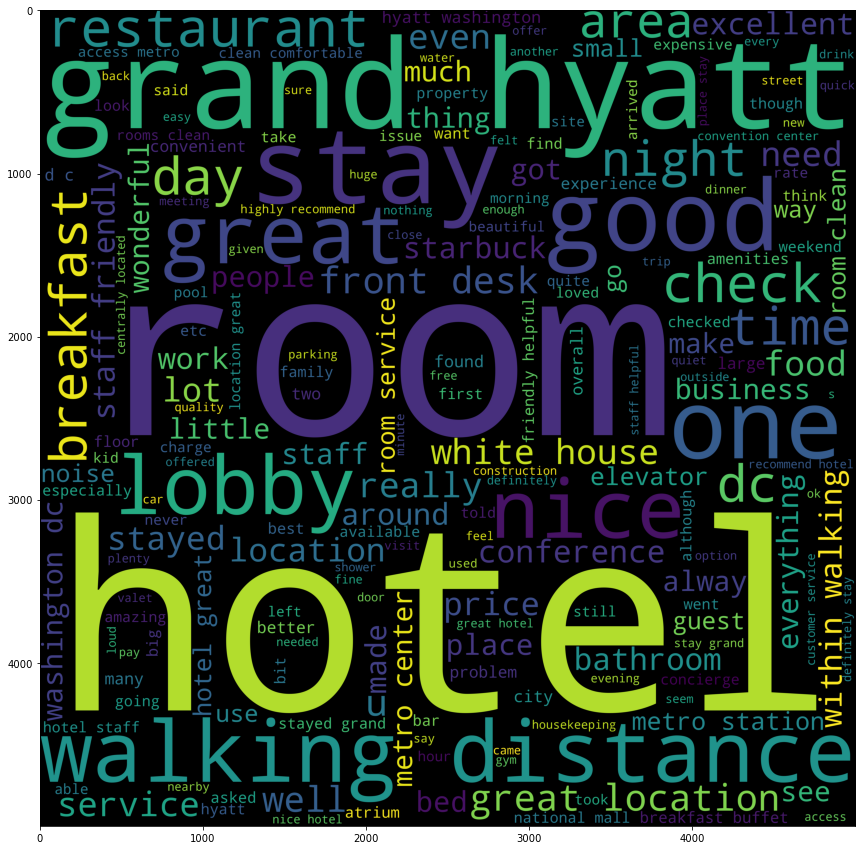

In [35]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black', width = 5000,height = 5000,).generate(string_positive)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_stw)

# Negative Reviews 

In [38]:
df_negative = df_review[df_review['analysis']=="Negative"]

In [39]:
string_negative = ' '.join(df_negative["Reviews"])

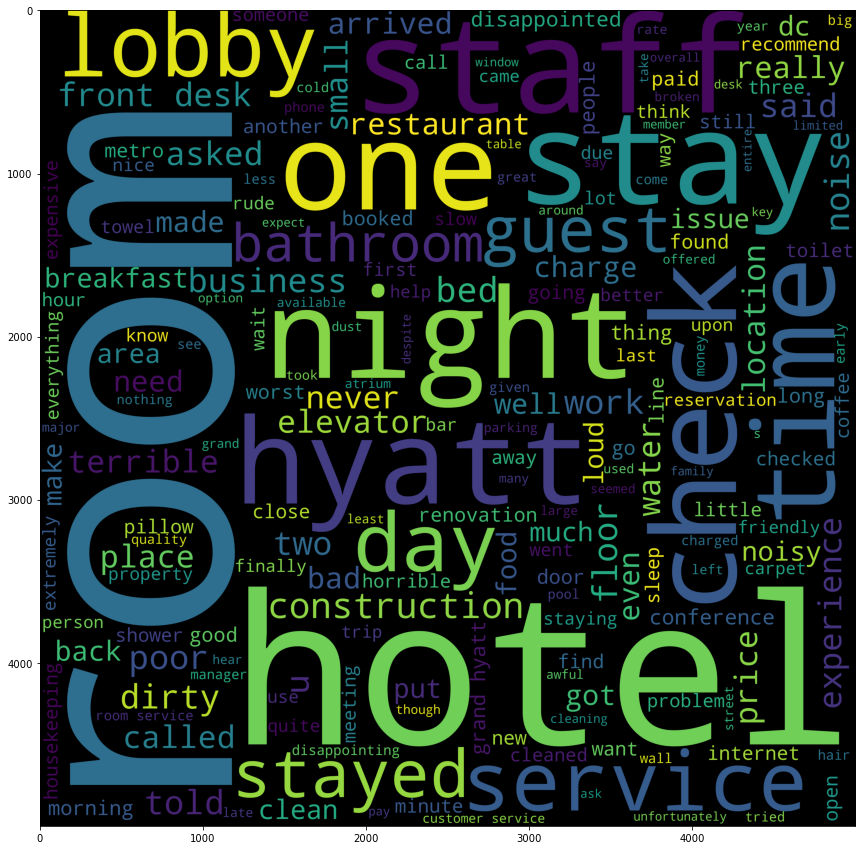

In [40]:
wordcloud_stw = WordCloud(background_color= 'Black',width = 5000,height = 5000,).generate(string_negative)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_stw)

# Neutral Reviews

In [41]:
df_neutral = df_review[df_review['analysis']=="Neutral"]

In [42]:
string_neutral = ' '.join(df_neutral["Reviews"])

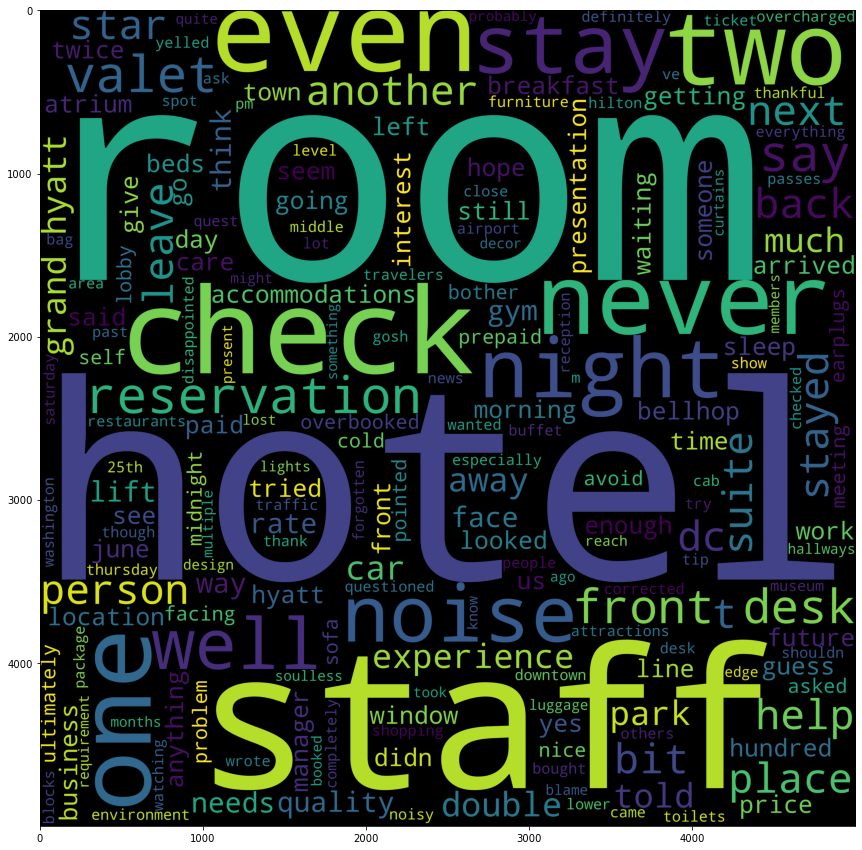

In [43]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(background_color= 'black', width = 5000,height = 5000,).generate(string_neutral)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_stw)

(array([5421.,    0.,    0.,    0.,    0.,  354.,    0.,    0.,    0.,
          24.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

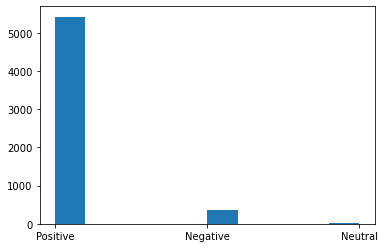

In [36]:
plt.hist(df_review['analysis'])

In [34]:
df_review["analysis"].value_counts()

Positive    5438
Negative     335
Neutral       26
Name: analysis, dtype: int64

In [35]:
from keras.preprocessing.text import Tokenizer
max_features = 5000
token = Tokenizer(num_words=max_features, split='   ')
token.fit_on_texts(df_review["Reviews"])

# TfidfVectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df_review["Reviews"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

In [27]:
df

,11,11th,12,12th,15,1th,24,25,35,45,...,workout,works,world,worn,worst,worth,wrong,year,years,yes
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.299001,0.0,0.0
3,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5795,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5796,0.0,0.15889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5797,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [42]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_review["analysis"] = labelencoder.fit_transform(df_review["analysis"])

<ipython-input-42-aa5f3f119ea3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["analysis"] = labelencoder.fit_transform(df_review["analysis"])


In [43]:
#0 = Negative  , 1= Neutral , 2=Positive
df_review

,Reviews,Ratings,subjectivity,polarity,analysis
0,attended conference here. location good room n...,4.0,0.641017,0.094264,2
1,else every dealing friendly helpful happy empl...,4.0,0.650000,0.593750,2
2,great time first time visiting washington dc. ...,5.0,0.516667,0.485000,2
3,back staff friendly professional valet parking...,5.0,0.364286,0.212500,2
4,stayed several time attending conferences may ...,3.0,0.415269,0.100323,2
...,...,...,...,...,...
5795,thought hyatt quite luxurious complaints servi...,3.0,0.530035,0.086979,2
5796,sister drove dc girls night stayed grand hyatt...,5.0,0.750000,0.362963,2
5797,stayed 3 nights hyatt conference washington co...,4.0,0.572454,0.086111,2
5798,went hotel wife weekend thinking grand hyatt w...,1.0,0.553333,0.380000,2


# Train, test split 

In [44]:
X = df
Y = df_review["analysis"]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [46]:
X_train

,11,11th,12,12th,15,1th,24,25,35,45,...,workout,works,world,worn,worst,worth,wrong,year,years,yes
5639,0.0,0.127207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4919,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
161,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
576,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174779,0.0
3264,0.0,0.000000,0.270307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1653,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2607,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [47]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


# Balancing the data using SMOTE 

In [48]:
#SMOTE(Synthetic Minority Oversampling Technique)
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0: {} \n".format(sum(Y_train == 0)))
print("Before OverSampling, counts of label '2':{}" . format(sum(Y_train == 2)))
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 1)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res == 1)))
print("After Oversampling, count of label '0 : {}".format(sum(Y_train_res == 0)))
print("After Oversampling, counts of label '2': {}".format(sum(Y_train_res == 2)))

Before OverSampling, counts of label '1': 18
Before OverSampling, counts of label '0: 244 

Before OverSampling, counts of label '2':3797
After OverSampling, the shape of train_X: (11391, 1000)
After OverSampling, the shape of train_y: (11391,) 

After OverSampling, counts of label '1': 3797
After Oversampling, count of label '0 : 3797
After Oversampling, counts of label '2': 3797


In [49]:
X_train.head()

,11,11th,12,12th,15,1th,24,25,35,45,...,workout,works,world,worn,worst,worth,wrong,year,years,yes
5639,0.0,0.127207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5248,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4919,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
Y_train.head()

5640    2
5249    2
4919    2
161     2
576     2
Name: analysis, dtype: int32

# Model Building 

# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.18      0.29        91
           1       0.00      0.00      0.00         8
           2       0.95      1.00      0.97      1641

    accuracy                           0.95      1740
   macro avg       0.60      0.39      0.42      1740
weighted avg       0.94      0.95      0.93      1740



C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy of RandomForestClassifier = 95%

# logistic regression model 

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report  

In [55]:
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.18      0.30        91
           1       0.00      0.00      0.00         8
           2       0.95      1.00      0.98      1641

    accuracy                           0.95      1740
   macro avg       0.65      0.39      0.42      1740
weighted avg       0.95      0.95      0.94      1740



C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.metrics import accuracy_score , precision_score , recall_score

print("Accuracy : ", accuracy_score(y_pred, Y_test))
print("Precision :", precision_score(y_pred, Y_test, average='weighted'))
print("Recall :", recall_score(y_pred, Y_test, average='weighted'))

Accuracy :  0.9522988505747126
Precision : 0.9924213717317165
Recall : 0.9522988505747126


C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy for Logistic Regression = 94.3%

# Multinomial Naive Bayes

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , precision_score , recall_score

In [60]:
clf = MultinomialNB()
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)
y_pred1 = clf.predict(X_test)

In [61]:
print("Accuracy : ", accuracy_score(y_pred1, Y_test))
print("Precision :", precision_score(y_pred1, Y_test, average='weighted'))
print("Recall :", recall_score(y_pred1, Y_test, average='weighted'))

Accuracy :  0.9442528735632184
Precision : 0.9971689520702947
Recall : 0.9442528735632184


C:\Users\DELL\Downloads\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy for Multinomial Naive Bayes = 93.75%

# SVC MODEL

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [62]:
model=SVC(kernel='linear')

In [63]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [64]:
metrics.accuracy_score(Y_test,model.predict(X_test))

0.9456896551724138

In [65]:
vec=model.support_vectors_

In [66]:
vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## ACCURACY FOR SVC = 94.4%

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model_sales = DecisionTreeClassifier(criterion='gini', max_depth=4) 

In [103]:
model_sales.fit(X_train, Y_train) 

DecisionTreeClassifier(max_depth=4)

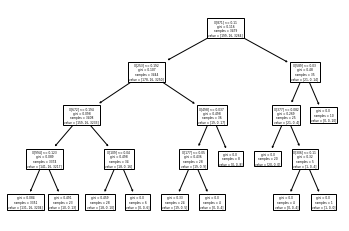

In [104]:
tree.plot_tree(model_sales);

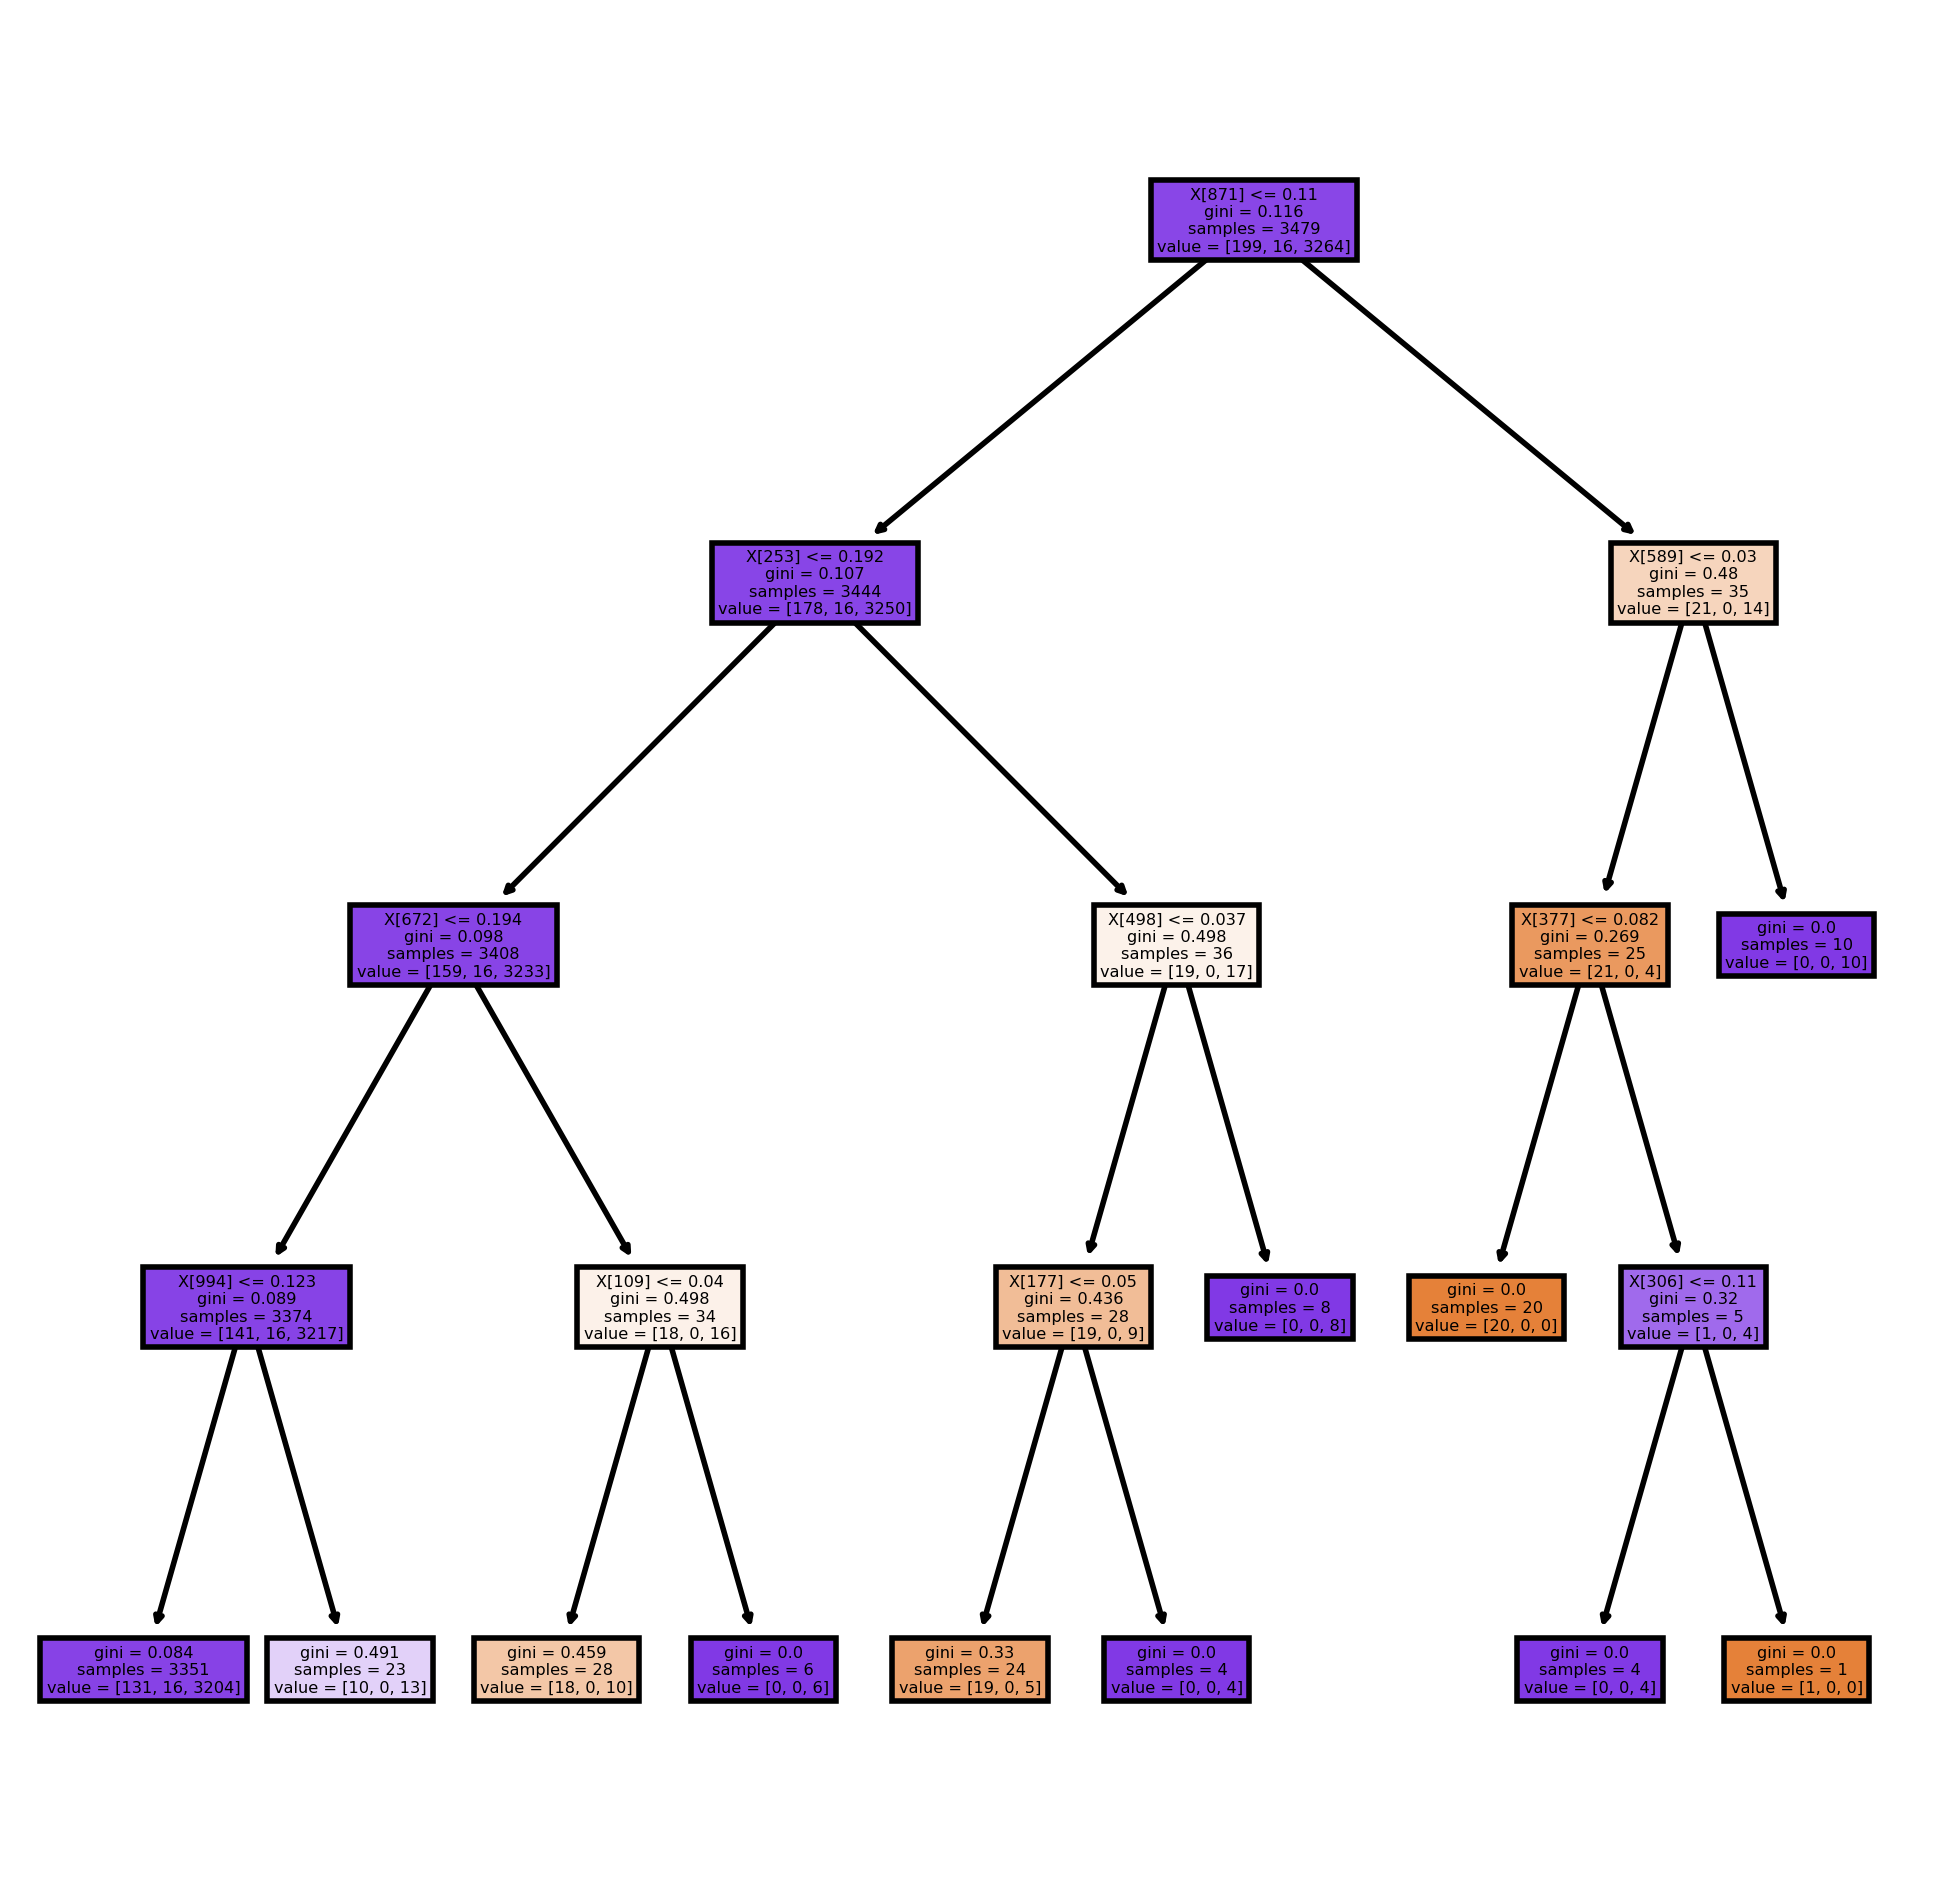

In [110]:
fn = X_train
cn = 0 ,1 ,2

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=400)
tree.plot_tree(model_sales,
               filled = True);

In [112]:
preds = model_sales.predict(X_test) 

In [113]:
np.mean(preds==Y_test) 

0.9413793103448276

In [155]:
from sklearn.metrics import accuracy_score , precision_score , recall_score
# prepare models
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f " % (name, cv_results.mean())
	print(msg)

RFC: 0.945681 
LR: 0.946889 
NB: 0.938613 
SVM: 0.941716 
DTC: 0.921367 


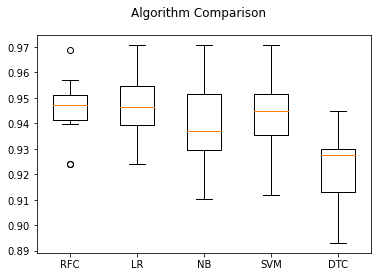

In [158]:
from matplotlib import pyplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [65]:
%%writefile app.py
 
import pickle
import streamlit as st

from nltk.tokenize import RegexpTokenizer

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import sequence
from sklearn.feature_extraction.text import TfidfVectorizer
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)


tokenizer = RegexpTokenizer(r'[a-zA-Z]+')


def add_sum_suffix(text):
    
    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        word = word + '_sum'
        new_text += word + ' '
        
    return new_text

def text_cleanup(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    token_list = tokenizer.tokenize(text.lower())
    new_text = ''
    for word in token_list:
        new_text += word + ' '
        
    return new_text
#===============================================================================================#

# Streamlit

#===============================================================================================#

sl.title("Hotel Review Classifier Application")


review_text = sl.text_area('Enter text here')

if sl.button('Predict'):
    
       
    result_review = review_text.title()

    review_text = text_cleanup(review_text)

    all_review_text = review_text 

    all_review_text = sequence.pad_sequences([all_review_text],padding='post',maxlen=250)

    prediction = model.predict(all_review_text)
    
    prediction = np.argmax(prediction)
    
    sl.success(prediction+1)





Overwriting app.py
